                   Uttar Pradesh Crime Data Analysis
This dataset captures the crime data across major cities of Uttar Pradesh in India. The cities are Ghaziabad, Lucknow and Kanpur. Data description as follows:

City = City of crime

Title = Summary of the crime

Text = Crime description in detail

Murder happened with reason = Crimes which resulted in murder and the reason

                            1:Property/Land Disputes,
                            2:Family Dispute
                            3:Petty Quarrels,
                            4:Money Disputes, 
                            5:Personal Vendetta, 
                            6:Love Affairs, 
                            7:Casteism
                            8: Unknown/other
Number of child victims = Number of child victims in the crime

Number of male victims(adult)` = Number of adult male victims in the crime

Number of female victims(adult)`= Number of adult female vcitims in the crime

Kidnnaping:Number of child victims = Number of child victims of kidnapping

Number of male(adult) = Number of adult males in the crime

Number of female(adult) = Number of adult females in the crime

Crime Against Women ( Combined )= Crime against women along with reason and relevant IPC section

                           1. Murder with Rape 
                           2. Dowry Deaths(Sec. 3048)
                           3. Suicide(sec 305/306)
                           4. Kidnapping(All)
                           5. Acid Attack(Sec. 326A IPC)
                           6. Cruelty by Husband/in-laws((Sec.498 A IPC)
                           7. Rape only(Sec. 376 or 511 IPC)
                           8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)
                           9. Cyber Crimes against Women
                           10. Protection of Children from Sexual Offences Act` = 
Number of adult victims` = Number of adult victims including males and females

Number of childs invoved = Number of child involved in the crime including the perpetrator and the victim

In [1]:
library(tm)
library(ggplot2)
library(GGally)
library(dplyr)
library(tidyverse)
library(wordcloud)
library(wordcloud2)
library(forcats)
library(NLP)


Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:httr’:

    content



Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.1     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::annotate() masks NLP::annotate()
✖ NLP::content()      masks httr::content()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()

Loading required package: RColorBrewer



Warning message:
“Missing column names filled in: 'X12' [12], 'X13' [13]”

── Column specification ────────────────────────────────────────────────────────
cols(
  City = col_character(),
  Title = col_character(),
  Text = col_character(),
  mcat = col_character(),
  `Number of child victims` = col_double(),
  `Number of male victims(adult)` = col_double(),
  `Number of female victims(adult)` = col_double(),
  `Kidnnaping:
Number of child victims` = col_double(),
  `Number of male(adult)` = col_double(),
  `Number of female(adult)` = col_double(),
  `Crime Against Women ( Combined ):` = col_double(),
  X12 = col_double(),
  X13 = col_double(),
  `Number of adult victims` = col_double(),
  `Number of childs invoved` = col_double()
)




[1] "0"                 "Money Disputes"    "Love Affairs"     
[4] "Unknown reasons"   "Petty Quarrels"    "Property Disputes"
[7] "Family Dispute"    "Personal Vendetta" "Casteism"

Lucknow has most number of cases, then comes Ghaziabad 
and least number of cases is in Kanpur



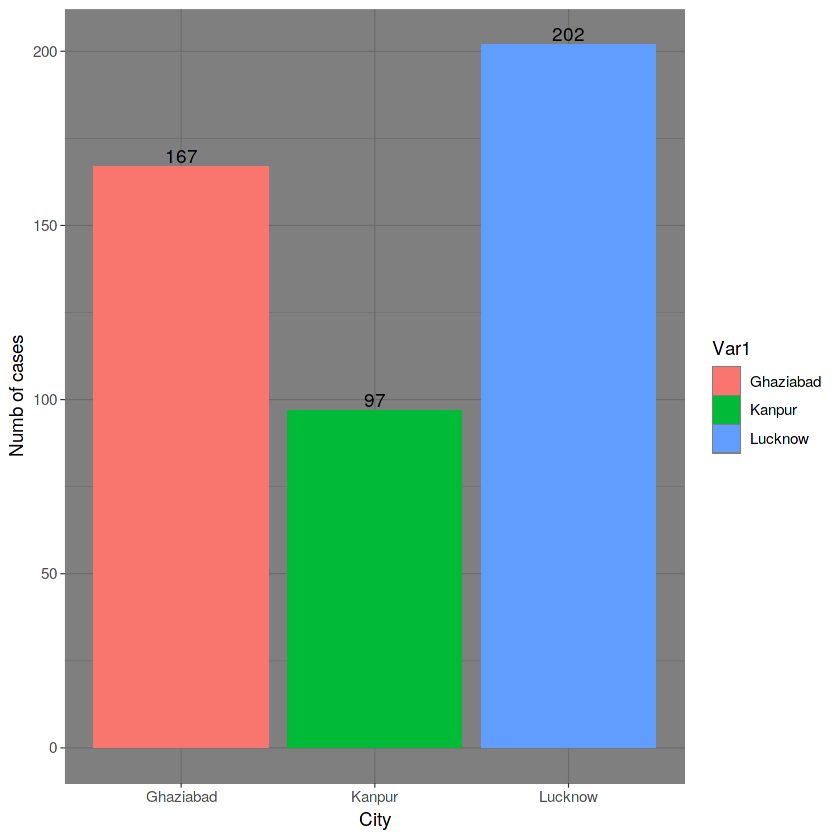

In [2]:
library(readr)
MRdata <- read_csv("../input/compiled-data-set/MRdata.csv")
x <- data.frame(MRdata)
#changeing Na values to 0 as Number of NA is large
x[is.na(x)] <- 0
#renaming for easy use
# here we have renamed- mcat <-x$Murder.Happened.with.reason..1.Property.Land.Disputes..2.Family.Dispute.3.Petty.Quarrels..4.Money.Disputes...5.Personal.Vendetta...6.Love.Affairs...7.Casteism.8..Unknown.other;
#Data summary Murder happened with reasons  
mcat=x$mcat;
categories<-unique(mcat)
categories
 categ <- unique(x$City)
 datas <- as.data.frame(table(x$City))

 datasmr <- as.data.frame(table(mcat))
 #Number of cases cases Vs City
 g1 <- ggplot(data = datas,aes(x=Var1,y=Freq,fill=Var1))+geom_bar(stat = "identity")+geom_text(aes(label= Freq), vjust=-0.25)+xlab("City")+theme_dark() +ylab("Numb of cases") ;
 g1
 
message("Lucknow has most number of cases, then comes Ghaziabad 
and least number of cases is in Kanpur")

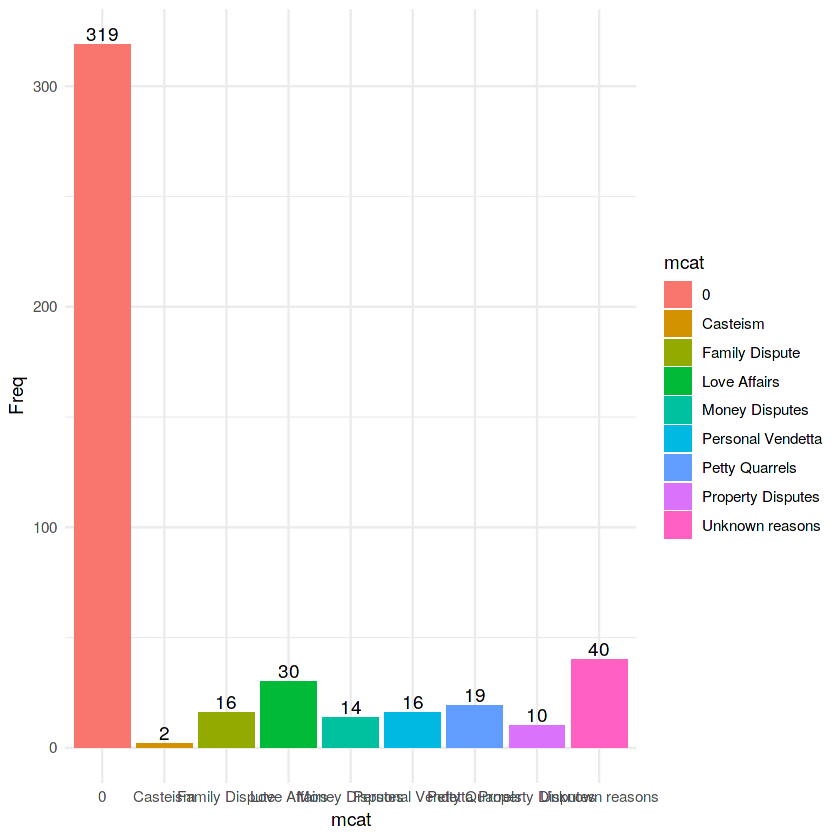

In [3]:

#Number of cases Vs murder reasons
 c <- ggplot(data = datasmr,aes(x=mcat,y=Freq,fill=mcat))+geom_bar(stat="identity")+geom_text(aes(label= Freq), position=position_dodge(width=0.9), vjust=-0.25)+theme_minimal()
 c;

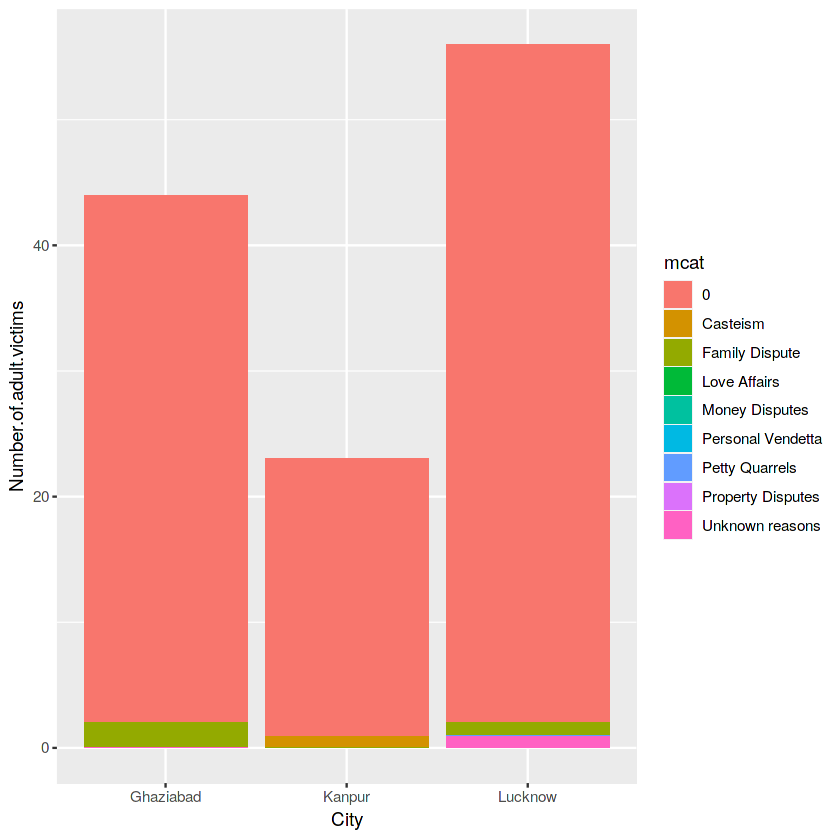

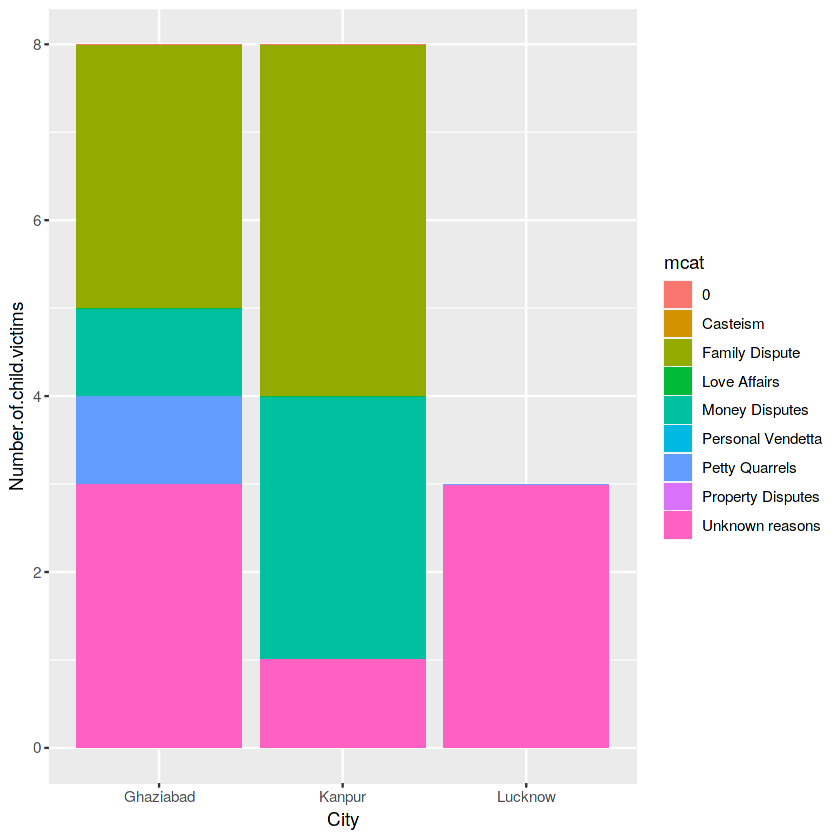

These are different reasons of murder in different cities and the
differenet number of victims that were affected



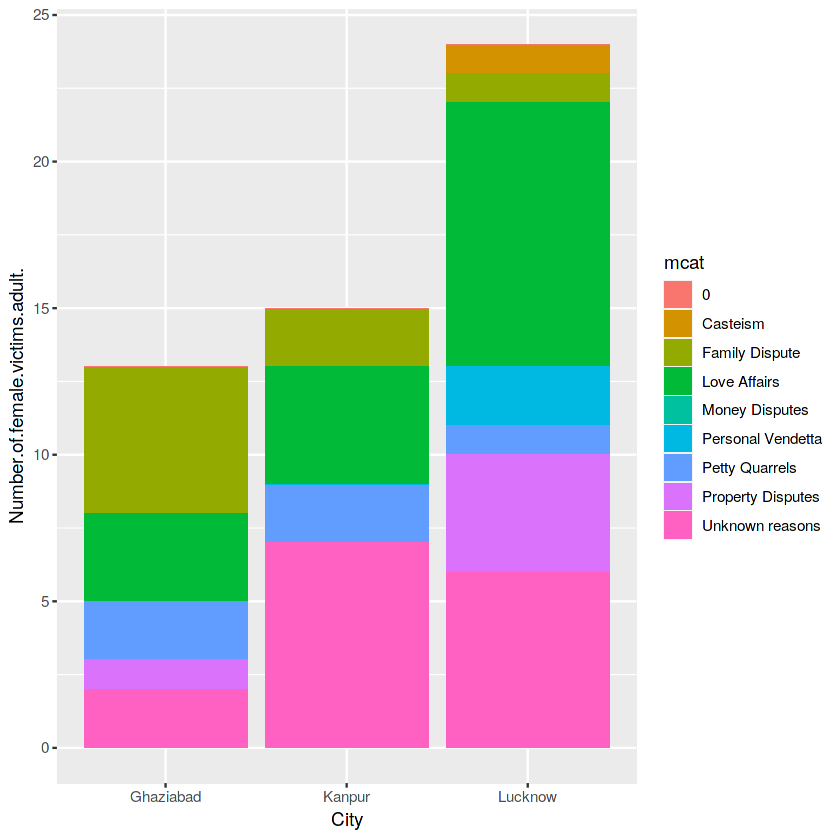

In [4]:
#Single Bargraph of diff categories of victims V/S categories of murder
 #Number of adult Victims
 q<-ggplot(data=x, aes(x=City,y=Number.of.adult.victims,fill=mcat))+geom_bar(stat="identity")
 q;
 #Number of Child Victims
 q1<-ggplot(data=x, aes(x=City,y=Number.of.child.victims,fill=mcat))+geom_bar(stat="identity")
 q1;
 #Number of female Victims 
 q2<-ggplot(data=x, aes(x=City,y=Number.of.female.victims.adult.,fill=mcat))+geom_bar(stat="identity")
 q2;
message("These are different reasons of murder in different cities and the
differenet number of victims that were affected")

City,x$Kidnnaping..Number.of.child.victims
<chr>,<dbl>
Ghaziabad,8
Kanpur,0
Lucknow,5


Most no of Kidnapping happens in Ghaziabad



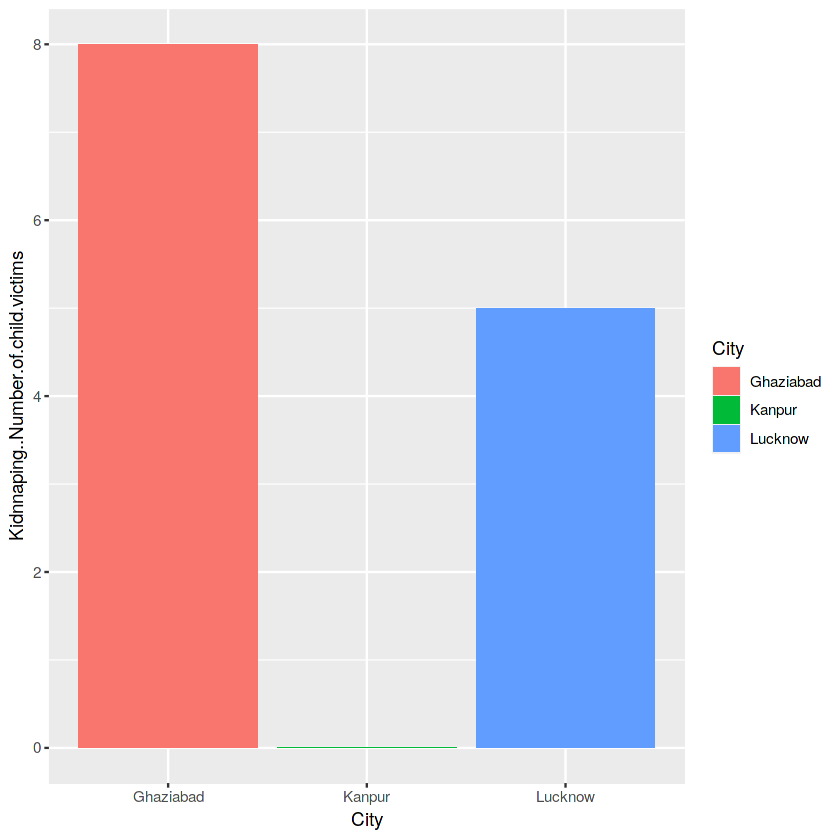

In [5]:
#Kiddnaping Vs city 
 q3<-ggplot(data=x, aes(x=City,y=Kidnnaping..Number.of.child.victims,fill= City))+geom_bar(stat="identity")
 q3
 caw <- (x$Crime.Against.Women...Combined...)
#confmirming the graph value0
aggregate(x$Kidnnaping..Number.of.child.victims~City,x,sum)
message("Most no of Kidnapping happens in Ghaziabad")

In [6]:
 #Number of people affected in crime against women
new <-data.frame(x$Number.of.adult.victims,x$Number.of.childs.invoved)
#Number of people involved against crime against women category
v1<- data.frame(rowSums(new))
g1<-data.frame(city=x$City,x11=caw,x12=x$X12,x13=x$X13,v1=v1$rowSums.new.)

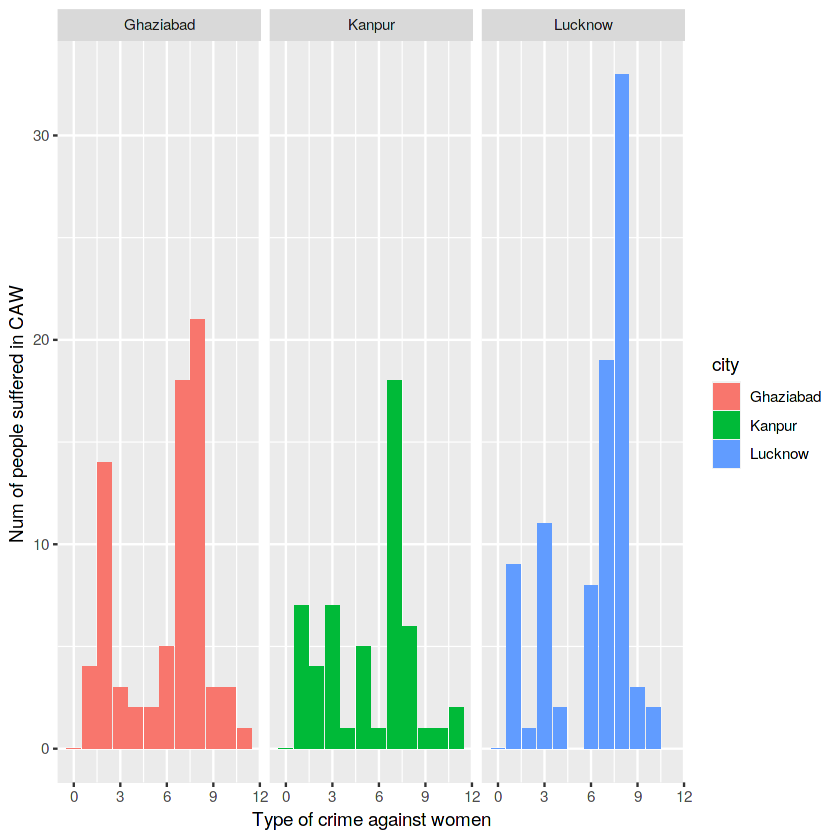

In [7]:
#Against 1 column
lol <- ggplot(g1,aes(x=x11,y=v1,fill=city))+ geom_bar( stat ="identity")+xlab("Type of crime against women")+ylab(("Num of people suffered in CAW "))+facet_wrap(~city)
lol


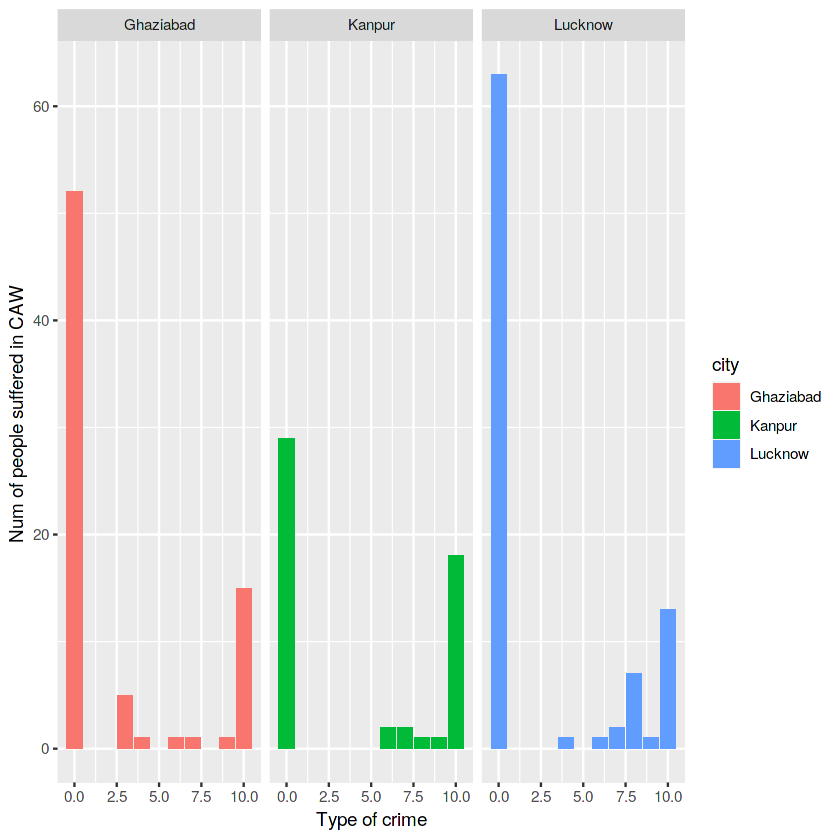

In [8]:
#Against 2 column
lol2 <- ggplot(g1,aes(x=x12,y=v1,fill=city))+ geom_bar( stat ="identity")+xlab("Type of crime")+ylab(("Num of people suffered in CAW "))+facet_wrap(~city)
lol2

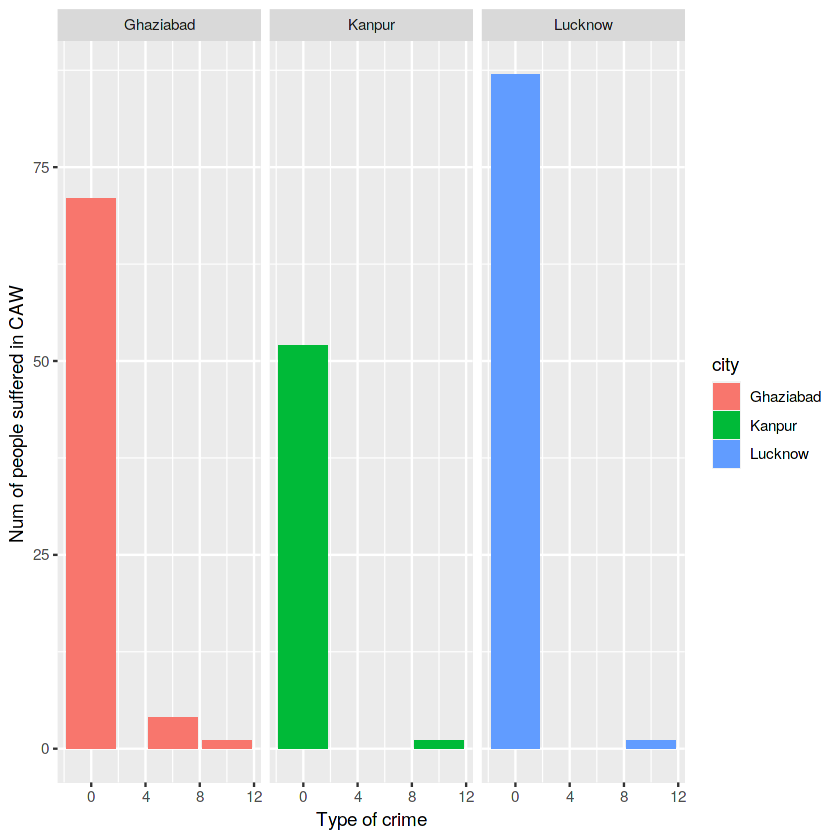

In [9]:
#Against 3 column
lol3 <- ggplot(g1,aes(x=x13,y=v1,fill=city))+ geom_bar( stat ="identity")+xlab("Type of crime")+ylab(("Num of people suffered in CAW "))+facet_wrap(~city)
lol3

In [10]:
#------------------------------------------------------------------
#word Cloud for text
title <- x$Text;
docs <- Corpus(VectorSource(title))
docs <- docs %>%
  tm_map(removeNumbers) %>%
  tm_map(removePunctuation) %>%
  tm_map(stripWhitespace)
docs <- tm_map(docs, content_transformer(tolower))
docs <- tm_map(docs, removeWords, stopwords("english"))
docs[[1]][1]
dtm <- TermDocumentMatrix(docs) 
matrix <- as.matrix(dtm) 
words <- sort(rowSums(matrix),decreasing=TRUE) 
dfx <- data.frame(word = names(words),freq=words)
wordcloud2(data=dfx, size=1.6, color='random-dark')

Warning message in tm_map.SimpleCorpus(., removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
“transformation drops documents”


$content
[1] "ghaziabad  yearold boy  sent   observation home  monday  molesting  sexually assaulting  sevenyearold mute girl  muradnagar  sunday evening police said  families   girl   minor accused  neighbours around pm  sunday   girl  playing outside  house  boy took    secluded area near  religious place  started molesting   girl resisted    children playing nearby spotted   immediately informed  family members  family   accused initially tried  hush  matter  offered  compromise   girl’s father   refused police said  girl’s father subsequently filed  complaint   boy  muradnagar police station sho  muradnagar police station umesh bahadur singh said  minor   booked  ipc section molestation  also  sections  sexual assault   protection  children  sexual offences pocso act  monday  minor accused  produced   juvenile justice board  sent    observation home last month  yearold boy  also arrested  allegedly raping  fiveyearold girl  murdanagar  november    lived  houses opposite     village  muradnagar  parents work  labourers prior    yearold boy  detained  allegedly raping  nineyearold girl  muradnagar  august according   girl’s father  crime  taken place  august   daughter  gone  attend  independence day function   school"

HTML widgets cannot be represented in plain text (need html)

In [11]:
#word Cloud for title
tex <- x$Text;
wordss <- c("said")
docs1 <- Corpus(VectorSource(tex))
docs1 <- docs1 %>%
  tm_map(removeNumbers) %>%
  tm_map(removePunctuation) %>%
  tm_map(stripWhitespace)
docs1 <- tm_map(docs1, content_transformer(tolower))
docs1 <- tm_map(docs1, removeWords,stopwords("english"))
docs1[[1]][1]
dtm1 <- TermDocumentMatrix(docs1) 
matrix1 <- as.matrix(dtm1) 
words1 <- sort(rowSums(matrix1),decreasing=TRUE) 
dfx1 <- data.frame(word = names(words1),freq=words1)
wordcloud2(data=dfx1, size=1.6, color='random-dark')


Warning message in tm_map.SimpleCorpus(., removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs1, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs1, removeWords, stopwords("english")):
“transformation drops documents”


$content
[1] "ghaziabad  yearold boy  sent   observation home  monday  molesting  sexually assaulting  sevenyearold mute girl  muradnagar  sunday evening police said  families   girl   minor accused  neighbours around pm  sunday   girl  playing outside  house  boy took    secluded area near  religious place  started molesting   girl resisted    children playing nearby spotted   immediately informed  family members  family   accused initially tried  hush  matter  offered  compromise   girl’s father   refused police said  girl’s father subsequently filed  complaint   boy  muradnagar police station sho  muradnagar police station umesh bahadur singh said  minor   booked  ipc section molestation  also  sections  sexual assault   protection  children  sexual offences pocso act  monday  minor accused  produced   juvenile justice board  sent    observation home last month  yearold boy  also arrested  allegedly raping  fiveyearold girl  murdanagar  november    lived  houses opposite     village  muradnagar  parents work  labourers prior    yearold boy  detained  allegedly raping  nineyearold girl  muradnagar  august according   girl’s father  crime  taken place  august   daughter  gone  attend  independence day function   school"

HTML widgets cannot be represented in plain text (need html)

Link for 1st wordcloud- https://drive.google.com/file/d/1ZqGBppYR01577okylMGxYQTzwh2NAwJl/view?usp=sharing
Link for 2nd wordcloud-
https://drive.google.com/file/d/1-PebfkVzIzyzJgaCooXV5M1qcPBUtba7/view?usp=sharing